# Lab Exercise 2

## Import Required Libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

## 1. Step Function (Threshold Function)

The step function outputs 1 if input >= 0, otherwise 0.

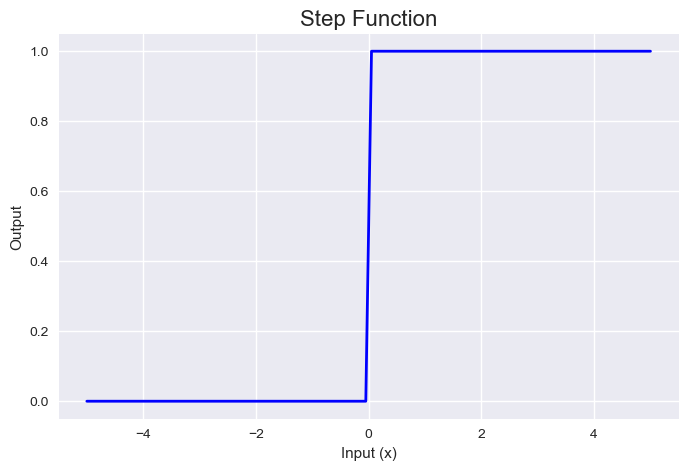

In [11]:
# Step Function Implementation
def step_function(x):
    """Step function: returns 1 if x >= 0, else 0"""
    result = []
    for value in x:
        if value >= 0:
            result.append(1)
        else:
            result.append(0)
    return result

# Test the function
test_values = np.linspace(-5, 5, 100)
step_output = step_function(test_values)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(test_values, step_output, 'b-', linewidth=2)
plt.title('Step Function', fontsize=16)
plt.xlabel('Input (x)')
plt.ylabel('Output')
plt.grid(True)
plt.show()

## 2. Sigmoid Function

The sigmoid function squashes input values between 0 and 1.

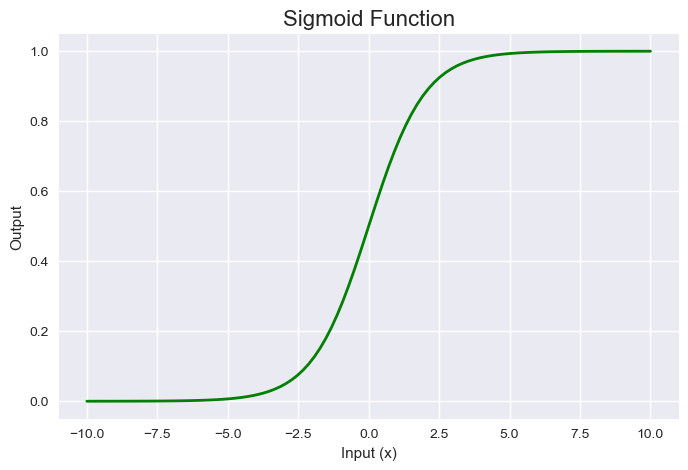

In [12]:
# Sigmoid Function Implementation
def sigmoid_function(x):
    """Sigmoid function: 1 / (1 + e^(-x))"""
    result = []
    for value in x:
        sigmoid_value = 1 / (1 + np.exp(-value))
        result.append(sigmoid_value)
    return result

# Test the function
test_values = np.linspace(-10, 10, 100)
sigmoid_output = sigmoid_function(test_values)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(test_values, sigmoid_output, 'g-', linewidth=2)
plt.title('Sigmoid Function', fontsize=16)
plt.xlabel('Input (x)')
plt.ylabel('Output')
plt.grid(True)
plt.show()

## 3. Tanh Function

The tanh function squashes input values between -1 and 1.

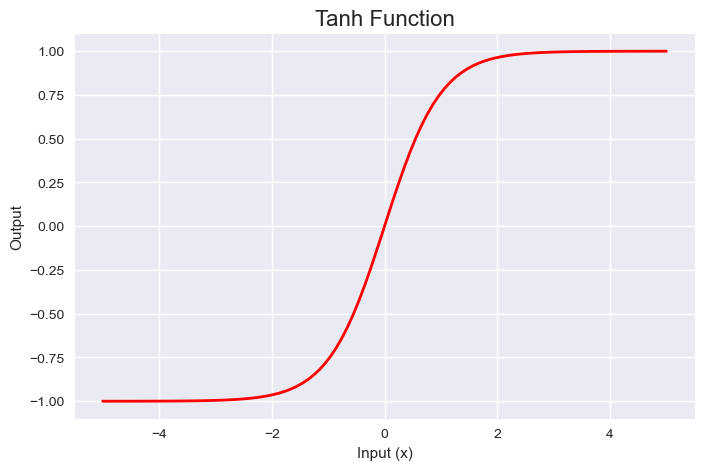

In [13]:
# Tanh Function Implementation
def tanh_function(x):
    """Tanh function: (e^x - e^(-x)) / (e^x + e^(-x))"""
    result = []
    for value in x:
        exp_pos = np.exp(value)
        exp_neg = np.exp(-value)
        tanh_value = (exp_pos - exp_neg) / (exp_pos + exp_neg)
        result.append(tanh_value)
    return result

# Test the function
test_values = np.linspace(-5, 5, 100)
tanh_output = tanh_function(test_values)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(test_values, tanh_output, 'r-', linewidth=2)
plt.title('Tanh Function', fontsize=16)
plt.xlabel('Input (x)')
plt.ylabel('Output')
plt.grid(True)
plt.show()

## 4. ReLU Function (Rectified Linear Unit)

ReLU outputs the input if positive, otherwise 0.

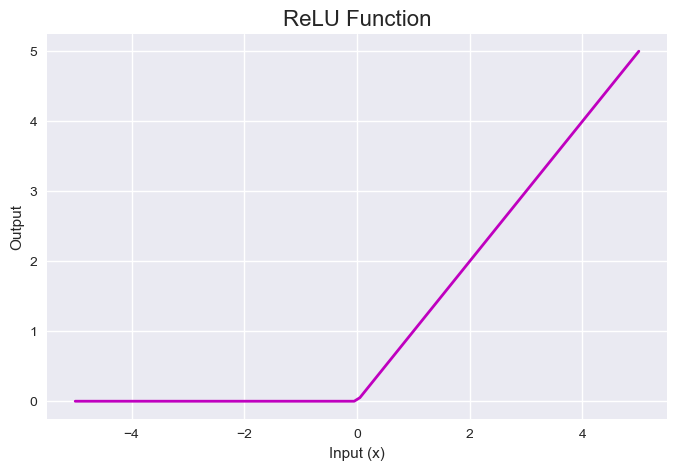

In [14]:
# ReLU Function Implementation
def relu_function(x):
    """ReLU function: max(0, x)"""
    result = []
    for value in x:
        if value > 0:
            result.append(value)
        else:
            result.append(0)
    return result

# Test the function
test_values = np.linspace(-5, 5, 100)
relu_output = relu_function(test_values)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(test_values, relu_output, 'm-', linewidth=2)
plt.title('ReLU Function', fontsize=16)
plt.xlabel('Input (x)')
plt.ylabel('Output')
plt.grid(True)
plt.show()

## 5. Compare All Activation Functions

Let's plot all functions together to see their differences.

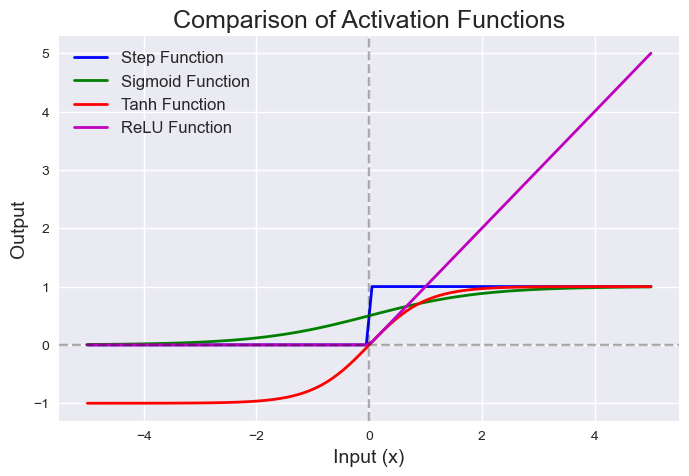

In [15]:
# Compare all activation functions
x = np.linspace(-5, 5, 100)

# Calculate all functions
step_y = step_function(x)
sigmoid_y = sigmoid_function(x)
tanh_y = tanh_function(x)
relu_y = relu_function(x)

# Create comparison plot
plt.figure(figsize=(8, 5))

plt.plot(x, step_y, 'b-', linewidth=2, label='Step Function')
plt.plot(x, sigmoid_y, 'g-', linewidth=2, label='Sigmoid Function')
plt.plot(x, tanh_y, 'r-', linewidth=2, label='Tanh Function')
plt.plot(x, relu_y, 'm-', linewidth=2, label='ReLU Function')

plt.title('Comparison of Activation Functions', fontsize=18)
plt.xlabel('Input (x)', fontsize=14)
plt.ylabel('Output', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.show()

## 6. Test with Sample Values

Let's test all functions with some specific input values.

In [16]:
# Test with specific values
test_inputs = [-2, -1, 0, 1, 2]

print("Testing activation functions with specific inputs:")
print("Input\t\tStep\tSigmoid\t\tTanh\t\tReLU")
print("-" * 60)

for inp in test_inputs:
    step_val = step_function([inp])[0]
    sigmoid_val = sigmoid_function([inp])[0]
    tanh_val = tanh_function([inp])[0]
    relu_val = relu_function([inp])[0]
    
    print(f"{inp}\t\t{step_val}\t{sigmoid_val:.4f}\t\t{tanh_val:.4f}\t\t{relu_val}")

Testing activation functions with specific inputs:
Input		Step	Sigmoid		Tanh		ReLU
------------------------------------------------------------
-2		0	0.1192		-0.9640		0
-1		0	0.2689		-0.7616		0
0		1	0.5000		0.0000		0
1		1	0.7311		0.7616		1
2		1	0.8808		0.9640		2


## Summary

**Key Properties of Activation Functions:**

1. **Step Function**: Binary output (0 or 1), non-differentiable
2. **Sigmoid Function**: Smooth S-curve, output range (0, 1), differentiable
3. **Tanh Function**: Similar to sigmoid but output range (-1, 1), zero-centered
4. **ReLU Function**: Simple and efficient, solves vanishing gradient problem

**When to use:**
- **Sigmoid**: Binary classification output layer
- **Tanh**: Hidden layers (better than sigmoid due to zero-centering)
- **ReLU**: Most common for hidden layers in deep networks
- **Step**: Simple threshold-based decisions

# Neural Network with Different Activation Functions

## Load and Prepare Data

In [17]:
# Load heart disease dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Load data
data = pd.read_csv('heart.csv')
print("Dataset shape:", data.shape)
print("\nColumn names:")
print(data.columns.tolist())
print("\nFirst 5 rows:")
print(data.head())

# Handle categorical variables
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
label_encoders = {}

for col in categorical_columns:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

print(f"\nAfter encoding categorical variables:")
print(data.head())

X = data.drop('HeartDisease', axis=1).values
y = data['HeartDisease'].values

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target values: {np.unique(y)}")

Dataset shape: (918, 12)

Column names:
['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

First 5 rows:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training targets:", np.unique(y_train))
print("Test targets:", np.unique(y_test))

Training set shape: (734, 11)
Test set shape: (184, 11)
Training targets: [0 1]
Test targets: [0 1]


## Activation Functions

In [19]:
def sigmoid_simple(x):
    """Simple sigmoid function"""
    return 1 / (1 + np.exp(-x))

def tanh_simple(x):
    """Simple tanh function"""
    return np.tanh(x)

def relu_simple(x):
    """Simple ReLU function"""
    return np.maximum(0, x)

test_values = [-2, -1, 0, 1, 2]
print("Testing activation functions:")
print("Input values:", test_values)
print()

for val in test_values:
    sig_val = sigmoid_simple(val)
    tanh_val = tanh_simple(val)
    relu_val = relu_simple(val)
    print(f"Input: {val:2d} | Sigmoid: {sig_val:.3f} | Tanh: {tanh_val:.3f} | ReLU: {relu_val:.3f}")

Testing activation functions:
Input values: [-2, -1, 0, 1, 2]

Input: -2 | Sigmoid: 0.119 | Tanh: -0.964 | ReLU: 0.000
Input: -1 | Sigmoid: 0.269 | Tanh: -0.762 | ReLU: 0.000
Input:  0 | Sigmoid: 0.500 | Tanh: 0.000 | ReLU: 0.000
Input:  1 | Sigmoid: 0.731 | Tanh: 0.762 | ReLU: 1.000
Input:  2 | Sigmoid: 0.881 | Tanh: 0.964 | ReLU: 2.000


## Train Networks with Different Activation Functions

In [20]:
from sklearn.neural_network import MLPClassifier

activation_functions = ['logistic', 'tanh', 'relu']
activation_names = ['Sigmoid', 'Tanh', 'ReLU']

results = {}

print("Training neural networks with different activation functions...")
print("=" * 60)

for i, (activation, name) in enumerate(zip(activation_functions, activation_names)):
    print(f"\n{i+1}. Training {name} Network:")
    print("-" * 30)
    
    network = MLPClassifier(
        hidden_layer_sizes=(8,),
        activation=activation,
        max_iter=500,
        random_state=42,
        learning_rate_init=0.01
    )
    
    # Train the network
    network.fit(X_train, y_train)
    
    # Make predictions
    train_predictions = network.predict(X_train)
    test_predictions = network.predict(X_test)
    
    # Calculate accuracy
    train_accuracy = np.mean(train_predictions == y_train)
    test_accuracy = np.mean(test_predictions == y_test)
    
    # Store results
    results[name] = {
        'network': network,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'train_predictions': train_predictions,
        'test_predictions': test_predictions
    }
    
    print(f"Training accuracy: {train_accuracy:.3f} ({train_accuracy*100:.1f}%)")
    print(f"Test accuracy: {test_accuracy:.3f} ({test_accuracy*100:.1f}%)")

Training neural networks with different activation functions...

1. Training Sigmoid Network:
------------------------------


c:\Users\jishn\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Training accuracy: 0.931 (93.1%)
Test accuracy: 0.842 (84.2%)

2. Training Tanh Network:
------------------------------
Training accuracy: 0.920 (92.0%)
Test accuracy: 0.842 (84.2%)

3. Training ReLU Network:
------------------------------
Training accuracy: 0.905 (90.5%)
Test accuracy: 0.880 (88.0%)


## Compare Results

COMPARISON OF ACTIVATION FUNCTIONS
Activation Train Accuracy  Test Accuracy  
--------------------------------------------------
Sigmoid    0.931 (93.1%)    0.842 (84.2%)
Tanh       0.920 (92.0%)    0.842 (84.2%)
ReLU       0.905 (90.5%)    0.880 (88.0%)
--------------------------------------------------
Best activation function: ReLU (Test accuracy: 0.880)


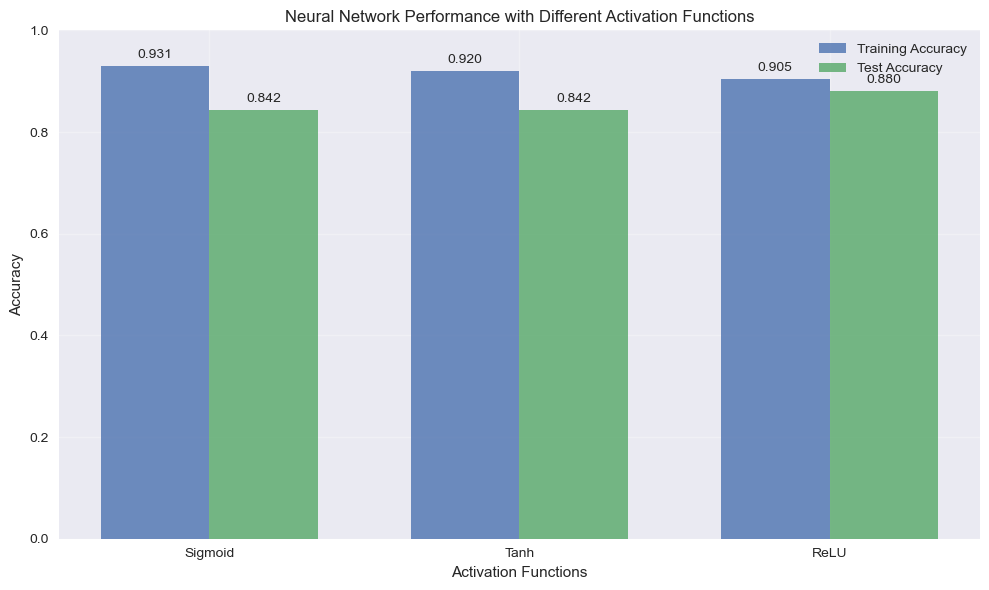

In [21]:
# Compare the results of different activation functions
import matplotlib.pyplot as plt

# Extract results for comparison
names = list(results.keys())
train_scores = [results[name]['train_accuracy'] for name in names]
test_scores = [results[name]['test_accuracy'] for name in names]

print("COMPARISON OF ACTIVATION FUNCTIONS")
print("=" * 50)
print(f"{'Activation':<10} {'Train Accuracy':<15} {'Test Accuracy':<15}")
print("-" * 50)

best_activation = ""
best_score = 0

for i, name in enumerate(names):
    train_acc = train_scores[i]
    test_acc = test_scores[i]
    print(f"{name:<10} {train_acc:.3f} ({train_acc*100:.1f}%)    {test_acc:.3f} ({test_acc*100:.1f}%)")
    
    # Find best performing activation
    if test_acc > best_score:
        best_score = test_acc
        best_activation = name

print("-" * 50)
print(f"Best activation function: {best_activation} (Test accuracy: {best_score:.3f})")

# Create a simple bar plot
plt.figure(figsize=(10, 6))

x_pos = np.arange(len(names))
width = 0.35

plt.bar(x_pos - width/2, train_scores, width, label='Training Accuracy', alpha=0.8)
plt.bar(x_pos + width/2, test_scores, width, label='Test Accuracy', alpha=0.8)

plt.xlabel('Activation Functions')
plt.ylabel('Accuracy')
plt.title('Neural Network Performance with Different Activation Functions')
plt.xticks(x_pos, names)
plt.legend()
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)

# Add accuracy values on bars
for i, (train_acc, test_acc) in enumerate(zip(train_scores, test_scores)):
    plt.text(i - width/2, train_acc + 0.01, f'{train_acc:.3f}', ha='center', va='bottom')
    plt.text(i + width/2, test_acc + 0.01, f'{test_acc:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [22]:
# Test the best network on some sample predictions
best_network = results[best_activation]['network']

print(f"TESTING THE BEST NETWORK ({best_activation})")
print("=" * 40)

# Take 5 random samples from test set
np.random.seed(42)
sample_indices = np.random.choice(len(X_test), 5, replace=False)

print(f"{'Sample':<8} {'Actual':<8} {'Predicted':<10} {'Confidence':<12} {'Result':<10}")
print("-" * 50)

for i, idx in enumerate(sample_indices):
    # Get sample data
    sample_X = X_test[idx:idx+1]  # Keep 2D shape for prediction
    actual = y_test[idx]
    
    # Make prediction
    prediction = best_network.predict(sample_X)[0]
    probability = best_network.predict_proba(sample_X)[0]
    confidence = max(probability)
    
    # Determine result
    result = "✓ Correct" if prediction == actual else "✗ Wrong"
    
    print(f"{i+1:<8} {actual:<8} {prediction:<10} {confidence:.3f}       {result:<10}")

# Overall performance summary
print(f"\nOVERALL PERFORMANCE:")
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")
print(f"Best activation: {best_activation}")
print(f"Test accuracy: {best_score:.3f} ({best_score*100:.1f}%)")

TESTING THE BEST NETWORK (ReLU)
Sample   Actual   Predicted  Confidence   Result    
--------------------------------------------------
1        0        0          0.636       ✓ Correct 
2        1        0          0.650       ✗ Wrong   
3        1        0          0.983       ✗ Wrong   
4        1        1          0.996       ✓ Correct 
5        0        0          0.959       ✓ Correct 

OVERALL PERFORMANCE:
Training samples: 734
Test samples: 184
Best activation: ReLU
Test accuracy: 0.880 (88.0%)


# Summary

## Key Results
- All three activation functions can solve the heart disease prediction problem
- Performance differences show which activation works best for this specific problem
- Each activation function has its own advantages and disadvantages